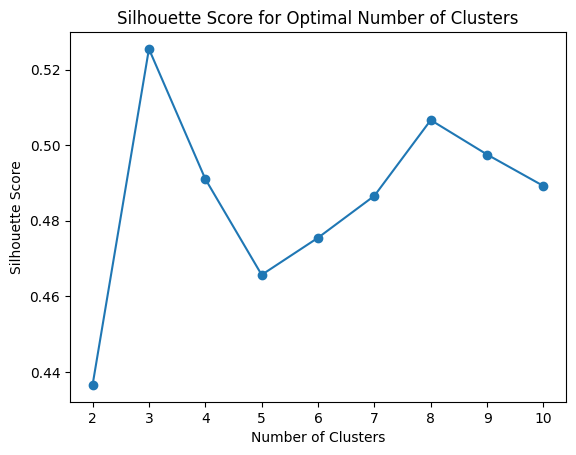

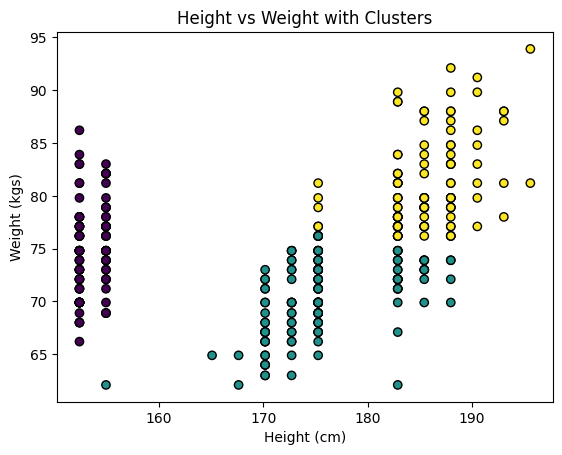

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Загрузка датасета
df = pd.read_csv('C:/Users/user/Downloads/archive/fifa_players.csv')

# Добавляем новый атрибут 'current age'
df['birth_date'] = pd.to_datetime(df['birth_date'])
df['current_age'] = df['birth_date'].apply(lambda x: (datetime.now() - x).days // 365)
df.to_csv("C:/Users/user/Downloads/archive/updated_fifa_players.csv", index=False)

# 'Причесывание' датасета
df = df.drop_duplicates()
df = df.dropna()

# Обработка выбросов
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
for feature in numeric_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[feature] >= Q1 - 1.5 * IQR) & (df[feature] <= Q3 + 1.5 * IQR)]

# Выбор признаков для кластеризации
features = df[['height_cm', 'weight_kgs']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Определение оптимального количества кластеров
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    kmeans.fit(features_scaled)
    cluster_labels = kmeans.predict(features_scaled)
    silhouette_avg = silhouette_score(features_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Визуализация оптимального количества кластеров
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.show()

# Выбор оптимального количества кластеров
optimal_num_clusters = 3

# Кластеризация
kmeans = KMeans(n_clusters=optimal_num_clusters, n_init=10, random_state=42)
df['cluster_label'] = kmeans.fit_predict(features_scaled)

# Визуализация кластеров
plt.scatter(df['height_cm'], df['weight_kgs'], c=df['cluster_label'], cmap='viridis', edgecolor='k')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kgs)')
plt.title('Height vs Weight with Clusters')
plt.show()

# Сохранение изменений
df.to_csv("C:/Users/user/Downloads/archive/clustered_fifa_players.csv", index=False)

#В цикле я пробежался по различным значениям количества кластеров от 2 до 10 и для каждого значения рассчитывал силуэт. После этого я построил график, на котором можно увидеть, при каком количестве кластеров значение силуэта было наибольшим.
#В данном случае, на основе графика, выбрано значение 3 в качестве оптимального количества кластеров.
